# lab-revisiting-machine-learning

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [2]:
#Uploading the data
data = pd.read_csv('learningSet.csv')

C:\Users\mburm\AppData\Local\Temp\ipykernel_19136\3559065650.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


In [3]:
#Displaying df
data

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

### Cleaning categoricals (Morning LAB)

In [4]:
#Splitting categorical values
categorical = data.select_dtypes(object)
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


In [5]:
#Cleaning data a bit before splitting into categorical and numerical
categorical['MAILCODE'].value_counts()

MAILCODE
     94013
B     1399
Name: count, dtype: int64

In [6]:
#Replacing with 'A' to highlight address is ok ('B' means bad address)
categorical['MAILCODE'] = np.where(categorical['MAILCODE']==" ","A",categorical['MAILCODE'])
categorical['MAILCODE'].value_counts()

MAILCODE
A    94013
B     1399
Name: count, dtype: int64

In [7]:
#Replacing the rest space characters with np.NaN
categorical = categorical.apply(lambda x: x.replace(" ", np.NaN))

In [8]:
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,T2,36,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,S1,14,E,H,NaN,NaN,NaN,M,M,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,NaN,NaN,NaN,L1E,NaN,NaN,N1E,N1E,N1E,N1E,NaN,F1E,L,G,X,X,X,A
2,AMH,NC,27017,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,R2,43,NaN,U,NaN,NaN,NaN,NaN,M,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,NaN,S4F,S4F,S4F,S4F,S4F,S4F,NaN,S4D,S4D,NaN,NaN,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,R2,44,E,U,NaN,NaN,NaN,NaN,F,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,NaN,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,NaN,NaN,L,E,X,X,X,C
4,NaN,FL,33176,A,NaN,0,X,X,NaN,NaN,XXXX,S2,16,E,H,NaN,NaN,NaN,NaN,F,3,NaN,12,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,Y,NaN,NaN,Y,NaN,Y,NaN,Y,NaN,Y,NaN,3,NaN,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,NaN,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


In [9]:
#Checking values with Nans in Categorical
categorical.isna().sum()/len(categorical)*100

OSOURCE      0.972624
STATE        0.000000
ZIP          0.000000
MAILCODE     0.000000
PVASTATE    98.471890
              ...    
RFA_2A       0.000000
MDMAUD_R     0.000000
MDMAUD_F     0.000000
MDMAUD_A     0.000000
GEOCODE2     0.334339
Length: 74, dtype: float64

In [10]:
#Putting it inside a dataframe (% null values)
nulls_percent_df = pd.DataFrame(categorical.isna().sum()/len(categorical)*100).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,OSOURCE,0.972624
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,0.000000
4,PVASTATE,98.471890
...,...,...
69,RFA_2A,0.000000
70,MDMAUD_R,0.000000
71,MDMAUD_F,0.000000
72,MDMAUD_A,0.000000


In [11]:
#Keeping only those with Nans
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
0,OSOURCE,0.972624
4,PVASTATE,98.471890
5,NOEXCH,0.007337
6,RECINHSE,92.974678
7,RECP3,97.886010
...,...,...
64,RFA_21,36.905211
65,RFA_22,26.881315
66,RFA_23,58.980003
67,RFA_24,38.750891


In [12]:
#Displaying first 60 rows
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].head(60)

,column_name,nulls_percentage
0,OSOURCE,0.972624
4,PVASTATE,98.471890
5,NOEXCH,0.007337
6,RECINHSE,92.974678
7,RECP3,97.886010
8,RECPGVG,99.880518
9,RECSWEEP,98.305245
11,DOMAIN,2.427368
12,CLUSTER,2.427368
13,AGEFLAG,30.968851


In [13]:
#Displaying last 4 rows
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0].tail(14)

,column_name,nulls_percentage
55,RFA_12,9.352073
56,RFA_13,42.152979
57,RFA_14,19.774242
58,RFA_15,68.625540
59,RFA_16,21.398776
60,RFA_17,28.979583
61,RFA_18,22.285457
62,RFA_19,25.669727
63,RFA_20,52.613927
64,RFA_21,36.905211


In [14]:
#Creating drop list with first columns requested to be excluded (NOTE: I have ZIP as a numerical column)
drop_list = ['OSOURCE', 'ZIP']

In [15]:
#Identifying columns that have over 50% missing values.
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>50]
columns_above_threshold['column_name']

4     PVASTATE
6     RECINHSE
7        RECP3
8      RECPGVG
9     RECSWEEP
15     CHILD03
16     CHILD07
17     CHILD12
18     CHILD18
21       SOLP3
22       SOLIH
23       MAJOR
24     GEOCODE
25    COLLECT1
26    VETERANS
27       BIBLE
28       CATLG
29       HOMEE
30        PETS
31      CDPLAY
32      STEREO
33    PCOWNERS
34       PHOTO
35      CRAFTS
36      FISHER
37    GARDENIN
38       BOATS
39      WALKER
40    KIDSTUFF
41       CARDS
42      PLATES
43     LIFESRC
44    PEPSTRFL
58      RFA_15
63      RFA_20
66      RFA_23
Name: column_name, dtype: object

In [16]:
#Counting them
print(len(columns_above_threshold['column_name']))

36


In [17]:
#Putting them in a list
drop_columns_list = list(columns_above_threshold['column_name'])

In [18]:
#Creating drop_list with including 'OSOURCE', 'ZIP' as they were asked to be excluded
drop_list = ['OSOURCE', 'ZIP']

In [19]:
#Appending into the drop_list those columns that have over 50% missing values.
drop_list = ['OSOURCE', 'ZIP']
for col in drop_columns_list:
    drop_list.append(col)
print(len(drop_list))
print(drop_list)

38
['OSOURCE', 'ZIP', 'PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'SOLIH', 'MAJOR', 'GEOCODE', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_15', 'RFA_20', 'RFA_23']


In [20]:
#Taking out VETERANS and SOLIH columns manually since we want to keep them (as they are relevant for our model)
drop_list = ['OSOURCE',
 'ZIP',
 'PVASTATE',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'SOLP3',
 'MAJOR',
 'GEOCODE',
 'COLLECT1',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'RFA_15',
 'RFA_20',
 'RFA_23']

print(len(drop_list))

36


In [21]:
# #Dropping columns in drop_list

# categorical = categorical.drop(drop_list, axis=1)
# categorical

In [22]:
#Cleaning STATE

#We start creating a df with the value counts of STATE
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()
df

#Here we create a list with those STATES with less than 2500 donors
df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])
other_states

#Here we create a list of 46 'other', to later build a dictionary to replace later the values with 'other' within the data frame
other = ['other']*46
dictionary = dict(zip(other_states, other))
dictionary

#Replacing other_states with value 'other'
value_mapping = dictionary
categorical['STATE'] = categorical['STATE'].replace(value_mapping)
categorical['STATE'].value_counts()


STATE
other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: count, dtype: int64

In [23]:
#ALTERNATIVE LEARNED IN LESSON TO CLEAN STATE

# #Here we are creating a df with the value counts of STATE
# df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

# #Here we create a list with those STATES with less than 2500 donors
# df.columns = ['state', 'count']
# other_states = list(df[df['count']<2500]['state'])

# #Here we define a function to clean other_states
# def clean_state(x):
#     if x in other_states:
#         return 'other'
#     else:
#         return x
    
# categorical['STATE'] = list(map(clean_state, categorical['STATE']))

In [24]:
#Checking GENDER
categorical['GENDER'].value_counts(dropna=False)

GENDER
F      51277
M      39094
NaN     2957
U       1715
J        365
C          2
A          2
Name: count, dtype: int64

In [25]:
#We move Nan into U (meaning unknown)
categorical['GENDER'] = categorical['GENDER'].fillna('F')
categorical['GENDER'].value_counts(dropna=False)

GENDER
F    54234
M    39094
U     1715
J      365
C        2
A        2
Name: count, dtype: int64

In [26]:
#We replace the rest, into 'other'
value_mapping = {'U':'other','J':'other','C':'other','A':'other'}
categorical['GENDER'] = categorical['GENDER'].replace(value_mapping)
categorical['GENDER'].value_counts()

GENDER
F        54234
M        39094
other     2084
Name: count, dtype: int64

In [27]:
#Checking DOMAIN
categorical['DOMAIN'].value_counts(dropna=False)

DOMAIN
R2     13623
T2     12369
S1     11503
S2      8530
C2      8264
C1      6145
C3      5280
T1      4982
R3      4809
U1      4510
U2      3254
U3      2598
NaN     2316
T3      2176
S3      1891
U4      1804
R1      1358
Name: count, dtype: int64

In [28]:
#We replace Nan with the mode (R2)
categorical['DOMAIN'] = categorical['DOMAIN'].fillna('R2')

In [29]:
#We split DOMAIN in A and B, since first digit means urbanicity level and second digit socioeconomic status 
categorical['DOMAIN_A'] = list(map(lambda x: x[0], categorical['DOMAIN']))
categorical['DOMAIN_B'] = list(map(lambda x: x[1], categorical['DOMAIN']))

In [30]:
#Since we split DOMAIN in 2 columns, we now drop it
categorical = categorical.drop(columns=['DOMAIN'])

In [31]:
#Checking MAILCODE
categorical['MAILCODE'].value_counts()

MAILCODE
A    94013
B     1399
Name: count, dtype: int64

In [32]:
#Since B is so meaningless vs A, we decide to drop (NOTE: remember to check mail code before actually sending out mail pieces)
drop_list.append('MAILCODE')

In [33]:
#Checking NOEXCH
categorical['NOEXCH'].value_counts(dropna=False)

NOEXCH
0      61203
0      33882
1        195
1         90
X         35
NaN        7
Name: count, dtype: int64

In [34]:
#Since NOEXCH is a flag, and the values of x and 1 are so meaningless compared to those in '0', we add to the drop_list
drop_list.append('NOEXCH')


In [35]:
#Checking MDMAUD
categorical['MDMAUD'].value_counts(dropna=False)

MDMAUD
XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: count, dtype: int64

In [36]:
#Since most of the data is unknown (XXXX) we will drop this column
drop_list.append('MDMAUD')

In [37]:
#Checking MDMAUD_R
categorical['MDMAUD_R'].value_counts(dropna=False)

MDMAUD_R
X    95118
C      109
L       70
D       65
I       50
Name: count, dtype: int64

In [38]:
#Checking MDMAUD_F
categorical['MDMAUD_F'].value_counts(dropna=False)

MDMAUD_F
X    95118
1      187
2       87
5       20
Name: count, dtype: int64

In [39]:
#Checking MDMAUD_A
categorical['MDMAUD_A'].value_counts(dropna=False)

MDMAUD_A
X    95118
C      249
L       23
M       17
T        5
Name: count, dtype: int64

In [40]:
#Equal to 'MDMAUD', since most of the data is unknown (XXXX) we will drop these 3 columns
drop_list = drop_list + ['MDMAUD_R', 'MDMAUD_F','MDMAUD_A']

In [41]:
drop_list

['OSOURCE',
 'ZIP',
 'PVASTATE',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'SOLP3',
 'MAJOR',
 'GEOCODE',
 'COLLECT1',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'RFA_15',
 'RFA_20',
 'RFA_23',
 'MAILCODE',
 'NOEXCH',
 'MDMAUD',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A']

In [42]:
#Checking CLUSTER
categorical['CLUSTER'].value_counts(dropna=False)

CLUSTER
40     3979
35     3624
36     3617
27     3553
24     3539
49     3315
12     3000
18     2897
13     2706
30     2607
39     2601
45     2515
43     2385
11     2378
51     2322
NaN    2316
14     2246
41     2176
44     1953
16     1947
2      1942
21     1891
8      1828
10     1804
46     1800
28     1630
17     1621
20     1568
53     1441
3      1428
34     1358
42     1358
23     1324
31     1285
22     1282
25     1275
38     1200
15     1173
1      1140
7      1076
5      1014
37      972
26      947
47      868
29      859
32      795
48      787
50      776
9       770
6       603
33      593
4       561
19      497
52      270
Name: count, dtype: int64

In [43]:
#Here we notice that those numbers are strings
categorical['CLUSTER'].sort_values().unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '5', '50', '51', '52', '53', '6', '7', '8', '9', nan], dtype=object)

In [44]:
#We decide to keep CLUSTER, and replace Nans with the mode (40)
categorical['CLUSTER'] = categorical['CLUSTER'].fillna('40')

In [45]:
#Checking HOMEOWNR
categorical['HOMEOWNR'].value_counts(dropna=False)

HOMEOWNR
H      52354
NaN    22228
U      20830
Name: count, dtype: int64

In [46]:
#Here we replace Nans with N (assumption: NAN means 'not a home owner')
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].fillna('N') 

In [47]:
#Checking DATASRCE
categorical['DATASRCE'].value_counts(dropna=False)

DATASRCE
3      43549
2      23455
NaN    21280
1       7128
Name: count, dtype: int64

In [48]:
#Here we replace Nans with 0 since means 'not found in any external data source'
categorical['DATASRCE'] = categorical['DATASRCE'].fillna('0')

In [49]:
#Checking GEOCODE2
categorical['GEOCODE2'].value_counts(dropna=False)

GEOCODE2
A      34484
B      28505
D      16580
C      15524
NaN      319
Name: count, dtype: int64

In [50]:
#We decide to keep GEOCODE, and replace Nans with the mode (A)
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A')

In [51]:
#Removing columns with similar information (example: RFA)
categorical

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,GRI,IL,61081,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,36,NaN,N,NaN,NaN,NaN,NaN,F,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C,T,2
1,BOA,CA,91326,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,14,E,H,NaN,NaN,NaN,M,M,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,NaN,NaN,NaN,L1E,NaN,NaN,N1E,N1E,N1E,N1E,NaN,F1E,L,G,X,X,X,A,S,1
2,AMH,NC,27017,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,43,NaN,U,NaN,NaN,NaN,NaN,M,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,NaN,S4F,S4F,S4F,S4F,S4F,S4F,NaN,S4D,S4D,NaN,NaN,S4D,S4D,S3D,L,E,X,X,X,C,R,2
3,BRY,CA,95953,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,44,E,U,NaN,NaN,NaN,NaN,F,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,NaN,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,NaN,NaN,L,E,X,X,X,C,R,2
4,NaN,FL,33176,A,NaN,0,X,X,NaN,NaN,XXXX,16,E,H,NaN,NaN,NaN,NaN,F,3,NaN,12,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,Y,NaN,NaN,Y,NaN,Y,NaN,Y,NaN,Y,NaN,3,NaN,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,NaN,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,other,99504,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,27,NaN,N,NaN,NaN,NaN,NaN,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L1G,F1G,F1G,NaN,F1G,P1G,P1G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,G,X,X,X,C,C,2
95408,DCD,TX,77379,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,24,E,H,NaN,NaN,NaN,M,M,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L1F,NaN,NaN,NaN,NaN,P1F,P1F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,F,X,X,X,A,C,1
95409,MBC,MI,48910,A,NaN,0,NaN,X,NaN,NaN,XXXX,30,NaN,N,NaN,NaN,NaN,NaN,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L3E,S4E,S4E,S3E,S3E,NaN,A2E,N3E,N3E,N3E,N3E,N3E,N3E,N2E,F1D,NaN,F1D,NaN,NaN,P1D,P1D,NaN,NaN,L,E,X,X,X,B,C,3
95410,PRV,CA,91320,A,NaN,0,X,NaN,NaN,NaN,XXXX,24,E,H,NaN,NaN,NaN,NaN,F,2,NaN,12,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,X,L4F,S4F,A3F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S3F,S2F,S2F,A1F,A1F,A1F,A1F,S2F,S3F,L,F,X,X,X,A,C,1


In [52]:
#Creating a for loop to include in the drop_list, those with RFA


for col_name in categorical.columns:
    if "RFA" in col_name:
        drop_list.append(col_name)     

In [53]:
# Since (RFA_2R and RFA_2A) are different than the other, we will keep both, and delete rest
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')

In [54]:
#We check again drop_list before dropping them from the data frame
drop_list

['OSOURCE',
 'ZIP',
 'PVASTATE',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'SOLP3',
 'MAJOR',
 'GEOCODE',
 'COLLECT1',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'RFA_15',
 'RFA_20',
 'RFA_23',
 'MAILCODE',
 'NOEXCH',
 'MDMAUD',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24']

In [55]:
#We drop the columns and print the remaining columns
categorical = categorical.drop(columns=drop_list)
categorical

,STATE,CLUSTER,AGEFLAG,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,NaN,N,F,0,NaN,NaN,L,E,C,T,2
1,CA,14,E,H,M,3,NaN,NaN,L,G,A,S,1
2,NC,43,NaN,U,M,3,NaN,NaN,L,E,C,R,2
3,CA,44,E,U,F,3,NaN,NaN,L,E,C,R,2
4,FL,16,E,H,F,3,12,NaN,L,F,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,NaN,N,M,0,NaN,NaN,L,G,C,C,2
95408,TX,24,E,H,M,3,NaN,NaN,L,F,A,C,1
95409,MI,30,NaN,N,M,0,NaN,NaN,L,E,B,C,3
95410,CA,24,E,H,F,2,12,NaN,L,F,A,C,1


### Cleaning numericals (Afternoon LAB)

In [56]:
#Splitting numerical values
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
numerical

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,4

In [57]:
#Replacing the rest space characters with np.NaN (just in case as they were some in categoricals)
numerical = numerical.apply(lambda x: x.replace(" ", np.NaN))

In [58]:
#Putting in a dataframe those with Nans, and keeping only them
#Putting it inside a dataframe (% null values)
nulls_percent_df = pd.DataFrame(numerical.isna().sum()/len(numerical)*100).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,24.802960
4,NUMCHLD,87.018404
...,...,...
400,AVGGIFT,0.000000
401,CONTROLN,0.000000
402,HPHONE_D,0.000000
403,RFA_2F,0.000000


In [60]:
#Keeping only those with Nans
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
3,AGE,24.802960
4,NUMCHLD,87.018404
5,INCOME,22.309563
6,WEALTH1,46.882992
8,MBCRAFT,55.395548
...,...,...
386,RAMNT_23,91.763091
387,RAMNT_24,81.409047
398,NEXTDATE,10.452564
399,TIMELAG,10.452564


In [61]:
#Identifying columns that have over 50% missing values.
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>50]
columns_above_threshold['column_name']

4       NUMCHLD
8       MBCRAFT
9      MBGARDEN
10      MBBOOKS
11     MBCOLECT
         ...   
383    RAMNT_20
384    RAMNT_21
385    RAMNT_22
386    RAMNT_23
387    RAMNT_24
Name: column_name, Length: 62, dtype: object

In [62]:
#Counting them
print(len(columns_above_threshold['column_name']))

62


In [63]:
#Putting them in a list
drop_columns_list = list(columns_above_threshold['column_name'])

In [64]:
#Appending into the drop_list those columns that have over 50% missing values.
drop_list = []
for col in drop_columns_list:
    drop_list.append(col)
print(len(drop_list))
print(drop_list)

62
['NUMCHLD', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'ADATE_15', 'ADATE_20', 'ADATE_23', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


In [65]:
#Including ADATE since these refer to the number of mails in specific dates
for col_name in numerical.columns:
    if "ADATE" in col_name:
        drop_list.append(col_name)
print(len(drop_list))
print(drop_list)

86
['NUMCHLD', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'ADATE_15', 'ADATE_20', 'ADATE_23', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24', 'ADATE_2', 'ADATE_3', 'ADATE_4', 'ADATE_5', 'ADATE_6', 'ADATE_7', 'ADATE_8', 'ADATE_9', 'ADATE_10', 'ADATE_11', 'ADATE_12', 'ADATE_13', 'ADATE_14', 'ADATE_15', 'ADATE_16', 'ADATE_17', 'ADATE_18', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'MAXADAT

In [66]:
#Filling NULL values with plots
numerical['AGE'].value_counts(dropna=False)

AGE
NaN     23665
50.0     1930
76.0     1885
72.0     1813
68.0     1809
        ...  
9.0         1
6.0         1
10.0        1
8.0         1
15.0        1
Name: count, Length: 97, dtype: int64

C:\Users\mburm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


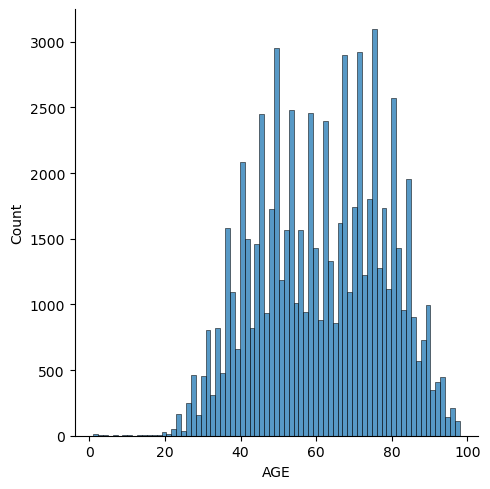

In [67]:
sns.displot(numerical['AGE'])
plt.show()

In [68]:
#We fill Nans with the mean
numerical['AGE'] = numerical["AGE"].fillna(np.mean(numerical['AGE'])) 

C:\Users\mburm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


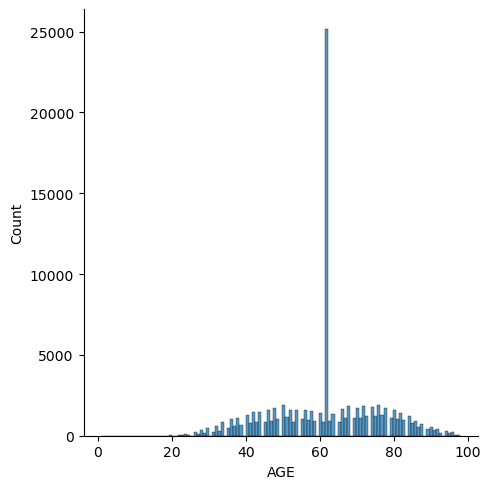

In [69]:
#Display it again with the result
sns.displot(numerical['AGE'])
plt.show()

C:\Users\mburm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


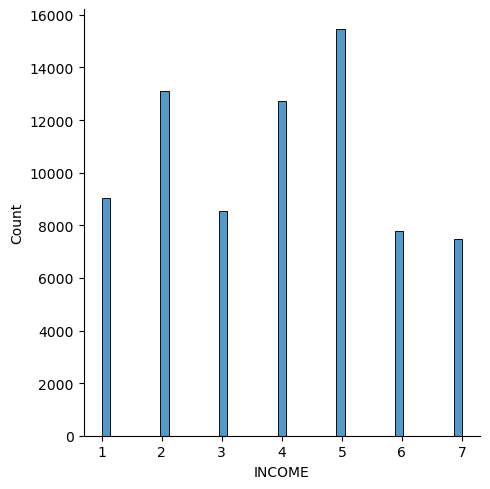

In [70]:
#Checking INCOME
sns.displot(numerical['INCOME']) 
plt.show()

In [71]:
#The variable is actually categorical. We can verify it by using value_counts()
print(numerical['INCOME'].value_counts(dropna=False))
numerical['INCOME'] = numerical['INCOME'].astype(object)

INCOME
NaN    21286
5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: count, dtype: int64


In [72]:
# Replacing the null values with the most represented category (5 as the mode)
numerical['INCOME'] = numerical['INCOME'].fillna(5.0) 


C:\Users\mburm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


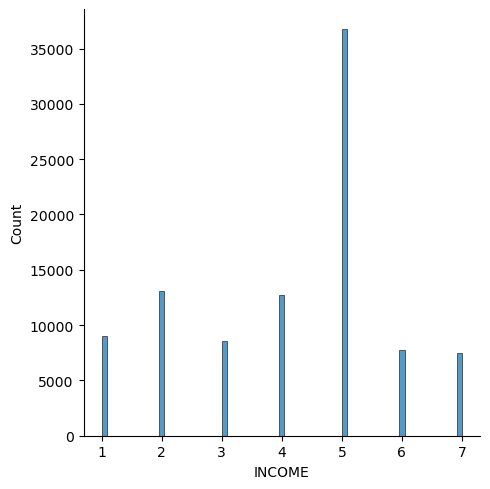

In [73]:
#Checking INCOME again (plotting)
sns.displot(numerical['INCOME']) 
plt.show()

C:\Users\mburm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


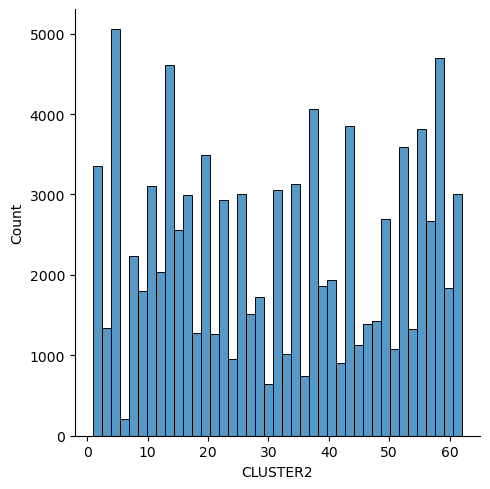

In [74]:
#Checking CLUSTER2
sns.displot(numerical['CLUSTER2'])
plt.show()

In [75]:
#Checking detail with value_counts
numerical['CLUSTER2'].value_counts(dropna=False)

CLUSTER2
13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
46.0     644
29.0     569
40.0     369
6.0      211
NaN      132
Name: count, Length: 63, dtype: int64

In [76]:
#Checking what is the mean rounded up
np.ceil(np.mean(numerical['CLUSTER2']))

32.0

In [77]:
# Replacing the null values with the mean
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(np.ceil(np.mean(numerical['CLUSTER2'])))

C:\Users\mburm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


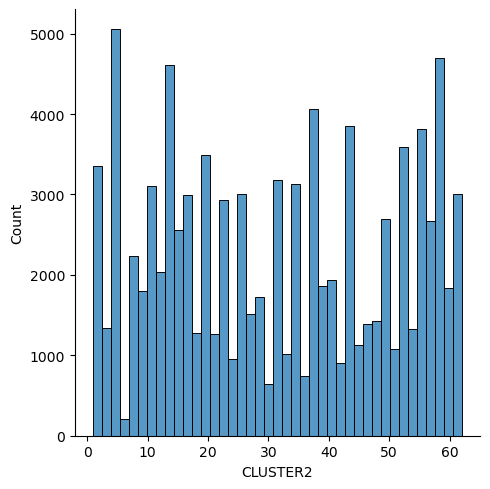

In [79]:
#Checking CLUSTER2 again
sns.displot(numerical['CLUSTER2']) 
plt.show()

In [80]:
#Checking details of WEALTH2 (important variable requested to keep)
numerical.WEALTH2.value_counts(dropna=False)

WEALTH2
NaN    43823
9.0     6523
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: count, dtype: int64

C:\Users\mburm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


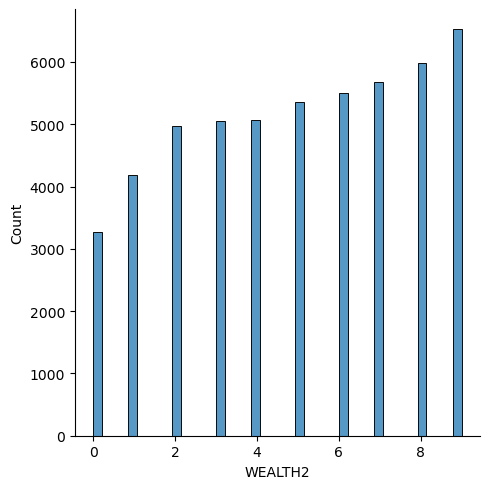

In [81]:
#Plotting it
sns.displot(numerical['WEALTH2']) 
plt.show()

In [82]:
# Replacing the null values with the median (5)
numerical['WEALTH2'] = numerical['WEALTH2'].astype('object')
numerical['WEALTH2'] = numerical['WEALTH2'].fillna('5.0')

C:\Users\mburm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


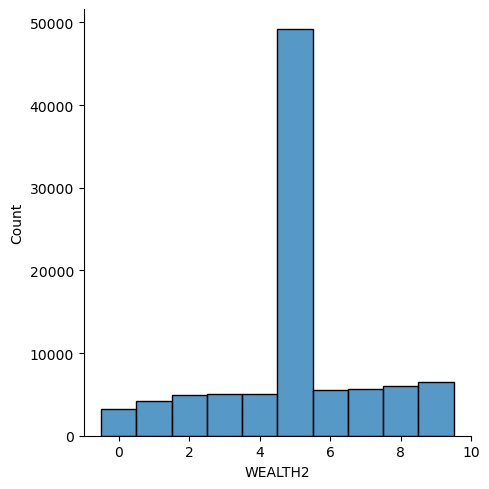

In [83]:
#Plotting it again
sns.displot(numerical['WEALTH2']) 
plt.show()

C:\Users\mburm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


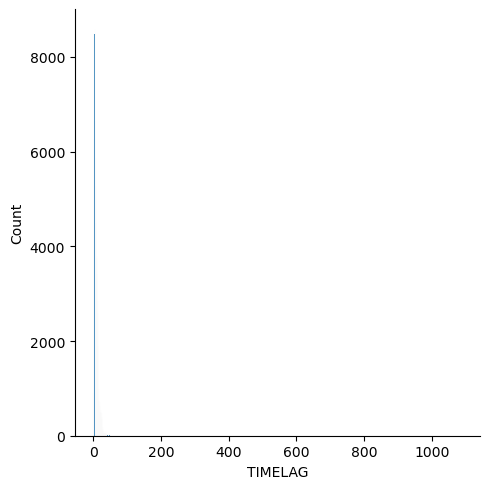

In [84]:
#Checking 'TIMELAG'
sns.displot(numerical['TIMELAG']) 
plt.show()

In [85]:
#Checking details of TIMELAG
numerical.TIMELAG.value_counts(dropna=False)

TIMELAG
NaN       9973
5.0       8584
4.0       8490
3.0       8485
6.0       6648
          ... 
89.0         1
1044.0       1
53.0         1
442.0        1
1088.0       1
Name: count, Length: 69, dtype: int64

In [87]:
# Since timelag means time between last and previous donation, 0.0 is a good alternative (NaN could mean that they only made one donation so far)
numerical['TIMELAG'] = numerical['TIMELAG'].fillna(0.0)

C:\Users\mburm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


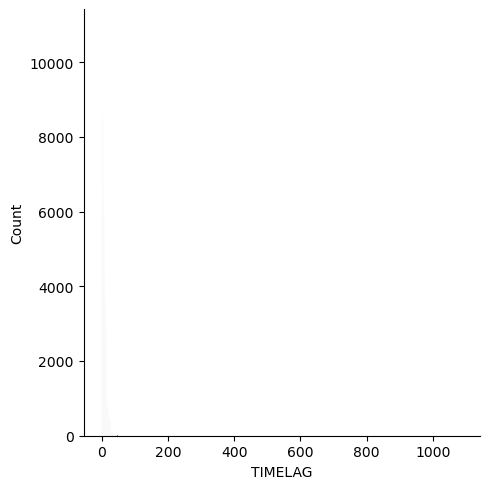

In [88]:
#Checking again
sns.displot(numerical['TIMELAG']) 
plt.show()

In [89]:
#Checking droplist before dropping them
drop_list

['NUMCHLD',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'ADATE_15',
 'ADATE_20',
 'ADATE_23',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_8',
 'RAMNT_9',
 'RAMNT_10',
 'RAMNT_11',
 'RAMNT_12',
 'RAMNT_13',
 'RAMNT_14',
 'RAMNT_15',
 'RAMNT_16',
 'RAMNT_17',
 'RAMNT_18',
 'RAMNT_19',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_22',
 'RAMNT_23',
 'RAMNT_24',
 'ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_5',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_10',
 'ADATE_11',
 'ADATE_12',
 'ADATE_13',
 'ADATE_14',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADA

In [90]:
#Dropping columns in numericals
numerical = numerical.drop(columns=drop_list)
numerical

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,5.0,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0